# Credit Risk Project Part II (Modeling)  

## Step 1: Data Transformation

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
loandf =pd.read_csv("editdummy.csv")
loandf.shape

(16381, 27)

In [ ]:
loandf.head()

,LStatus,AIncome,ANumberChildren,GCollateralAmount,GGuarantorNumber,Age,AGender_M,GCollateralType_PER,GCollateralType_REA,GCollateralType_SAV,...,AOccupation_OWN,AOccupation_PRV,AOccupation_SLF,AOccupation_UNI,AEducation_HIGHER,AEducation_LOWER,AHousing_OTH,AHousing_OWN,AHousing_REN,AHousing_WEL
0,0,35251.686583,2,0.0,2,41.767938,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,35251.686583,0,0.0,2,41.767938,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,32624.811225,0,0.0,2,41.767938,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
3,0,35251.686583,0,0.0,3,41.767938,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,32624.811225,0,0.0,3,41.767938,1,1,0,0,...,0,0,0,1,0,1,0,1,0,0


In [ ]:
loandf.describe()

,LStatus,AIncome,ANumberChildren,GCollateralAmount,GGuarantorNumber,Age,AGender_M,GCollateralType_PER,GCollateralType_REA,GCollateralType_SAV,...,AOccupation_OWN,AOccupation_PRV,AOccupation_SLF,AOccupation_UNI,AEducation_HIGHER,AEducation_LOWER,AHousing_OTH,AHousing_OWN,AHousing_REN,AHousing_WEL
count,16381.000000,16381.000000,16381.000000,1.638100e+04,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,...,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000,16381.000000
mean,0.173799,34089.731833,0.493682,1.560267e+05,1.914962,41.767938,0.593676,0.755326,0.129540,0.100177,...,0.013735,0.087113,0.109334,0.005738,0.020023,0.526769,0.117270,0.212869,0.187229,0.171540
std,0.378948,6463.889588,0.906313,6.048408e+05,0.707303,8.785589,0.491161,0.429907,0.335807,0.300245,...,0.116394,0.282009,0.312067,0.075537,0.140084,0.499298,0.321752,0.409348,0.390107,0.376992
min,0.000000,8500.000000,0.000000,0.000000e+00,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30024.357738,0.000000,0.000000e+00,2.000000,35.083333,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,34017.767342,0.000000,0.000000e+00,2.000000,41.750000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,38000.000000,1.000000,0.000000e+00,2.000000,48.666667,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,118200.000000,12.000000,3.088800e+07,10.000000,60.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
loandf["LStatus"].value_counts()

0    13534
1     2847
Name: LStatus, dtype: int64

In [ ]:
for i in range(len(loandf.columns)):
    print(f"{i-1}: {loandf.columns[i]}")

-1: LStatus
0: AIncome
1: ANumberChildren
2: GCollateralAmount
3: GGuarantorNumber
4: Age
5: AGender_M
6: GCollateralType_PER
7: GCollateralType_REA
8: GCollateralType_SAV
9: AMaritalStatus_MAR
10: AMaritalStatus_SEP
11: AMaritalStatus_SIN
12: AMaritalStatus_UNR
13: AMaritalStatus_WID
14: AOccupation_MER
15: AOccupation_OTH
16: AOccupation_OWN
17: AOccupation_PRV
18: AOccupation_SLF
19: AOccupation_UNI
20: AEducation_HIGHER
21: AEducation_LOWER
22: AHousing_OTH
23: AHousing_OWN
24: AHousing_REN
25: AHousing_WEL


## Step 2: Training Neural Network

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

### 2.1 From DataFrame to Tensor

In [ ]:
loants = torch.from_numpy(loandf.to_numpy().copy().astype(np.float32))
print(loants[:10,])
print(loants.shape,loants.type())

tensor([[0.0000e+00, 3.5252e+04, 2.0000e+00, 0.0000e+00, 2.0000e+00, 4.1768e+01,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.5252e+04, 0.0000e+00, 0.0000e+00, 2.0000e+00, 4.1768e+01,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.2625e+04, 0.0000e+00, 0.0000e+00, 2.0000e+00, 4.1768e+01,
         1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+

### 2.2 Train-Val-Test Split

In [ ]:
n_samples = loants.shape[0]
n_val = int(0.2 * n_samples)
n_test = int(0.2 * n_samples)
print(n_val, n_test)

3276 3276


In [ ]:
torch.manual_seed(12254)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:n_samples - 2*n_test]
val_indices = shuffled_indices[n_samples -2*n_test:n_samples - n_test]
test_indices = shuffled_indices[n_samples - n_test:]

In [ ]:
shuffled_indices

tensor([ 9267,   980,  5269,  ..., 14909,  4321, 14234])

In [ ]:
loants_train = loants[train_indices]
loants_val = loants[val_indices]
loants_test = loants[test_indices]
loants_train.shape, loants_val.shape, loants_test.shape

(torch.Size([9829, 27]), torch.Size([3276, 27]), torch.Size([3276, 27]))

In [ ]:
xmat_all = loants[:,1:]
yvec_all = loants[:,0]

xmat_train = loants_train[:,1:]
yvec_train = loants_train[:,0].reshape((-1,1))

xmat_val = loants_val[:,1:]
yvec_val = loants_val[:,0].reshape((-1,1))

xmat_test = loants_test[:,1:]
yvec_test = loants_test[:,0].reshape((-1,1))

xmat_train.shape, yvec_train.shape, xmat_val.shape, yvec_val.shape, xmat_test.shape, yvec_test.shape

(torch.Size([9829, 26]),
 torch.Size([9829, 1]),
 torch.Size([3276, 26]),
 torch.Size([3276, 1]),
 torch.Size([3276, 26]),
 torch.Size([3276, 1]))

In [ ]:
xmat_val[0,:]

tensor([2.2500e+04, 0.0000e+00, 0.0000e+00, 2.0000e+00, 3.2417e+01, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00])

### 2.3 Data Preprocessing (Min-Max Scaling or Mean-SD Scaling)

In [ ]:
#Standardize Age
def min_max_scaler(xmat_train, xmat_val, xmat_test, col_idx):
    max_val = torch.max(xmat_train[:, col_idx])
    min_val = torch.min(xmat_train[:, col_idx])
    xmat_train[:, col_idx] = (xmat_train[:, col_idx] - min_val)/(max_val -  min_val)
    xmat_val[:, col_idx] = (xmat_val[:, col_idx] - min_val)/(max_val -  min_val)
    xtest_val[:, col_idx] = (xtest_val[:, col_idx] - min_val)/(max_val -  min_val)
    return xmat_train, xmat_val, xmat_test

def mean_SD_scaler(xmat_train, xmat_val, xmat_test, col_idx):
    mean = torch.mean(xmat_train[:, col_idx])
    std = torch.std(xmat_train[:, col_idx])
    xmat_train[:, col_idx] = (xmat_train[:, col_idx] - mean)/(std)
    xmat_val[:, col_idx] = (xmat_val[:, col_idx] - mean)/(std)
    xmat_test[:, col_idx] = (xmat_test[:, col_idx] - mean)/(std)
    return xmat_train, xmat_val, xmat_test

In [ ]:
xmat_train_u = xmat_train.clone()
xmat_val_u = xmat_val.clone()
xmat_test_u = xmat_test.clone()

xmat_train, xmat_val, xmat_test = mean_SD_scaler(xmat_train, xmat_val, xmat_test, 0) 
xmat_train, xmat_val, xmat_test = mean_SD_scaler(xmat_train, xmat_val, xmat_test, 2) 
xmat_train, xmat_val, xmat_test = mean_SD_scaler(xmat_train, xmat_val, xmat_test, 4) 

In [ ]:
xmat_train_u[:,]

tensor([[2.6700e+04, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        [3.2700e+04, 1.0000e+00, 0.0000e+00,  ..., 1.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.8900e+04, 2.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         1.0000e+00],
        ...,
        [3.9900e+04, 1.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.1039e+04, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.9100e+04, 2.0000e+00, 2.0000e+04,  ..., 0.0000e+00, 1.0000e+00,
         0.0000e+00]])

In [ ]:
xmat_train[:,]

tensor([[-1.1532,  0.0000, -0.2652,  ...,  0.0000,  0.0000,  1.0000],
        [-0.2290,  1.0000, -0.2652,  ...,  1.0000,  0.0000,  0.0000],
        [ 0.7260,  2.0000, -0.2652,  ...,  0.0000,  0.0000,  1.0000],
        ...,
        [ 0.8800,  1.0000, -0.2652,  ...,  0.0000,  0.0000,  0.0000],
        [-0.4848,  0.0000, -0.2652,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.7568,  2.0000, -0.2303,  ...,  0.0000,  1.0000,  0.0000]])

In [ ]:
xmat_train.shape

torch.Size([9829, 26])

### 2.4 Baseline Model

In [ ]:
# https://stackoverflow.com/questions/15792552/numpy-scipy-equivalent-of-r-ecdfxx-function
def ecdf(x):
    x = np.sort(x)
    n = len(x)
    def _ecdf(v):
        # side='right' because we want Pr(x <= v)
        return (np.searchsorted(x, v, side='right') + 1) / n
    return _ecdf

In [ ]:
def get_ksscore(y_hat_val, yvec_val):
    goodpdvec = y_hat_val[yvec_val == 0]
    badpdvec = y_hat_val[yvec_val == 1]
    fgood = ecdf(goodpdvec)
    fbad =  ecdf(badpdvec)
    scorevec = np.linspace(0, 1,num= 1000)
    ks = max(abs(fgood(scorevec) - fbad(scorevec)))
    ksscoreindex = np.where(abs(fgood(scorevec) - fbad(scorevec)) == ks)
    ksscore = scorevec[ksscoreindex[0]]
    return ksscore

In [ ]:
def get_classification_report(y_hat_val, yvec_val, threshold):
    yhat =np.where(y_hat_val >= threshold, 1, 0)
    yvec = yvec_val
    df = pd.DataFrame(0, index = ["y=0", "y=1"], columns = ["yhat = 0", "yhat = 1"])
    df.iloc[0,0] = sum((yvec == 0) & (yhat == 0))
    df.iloc[0,1] = sum((yvec == 0) & (yhat == 1))
    df.iloc[1,0] = sum((yvec == 1) & (yhat == 0))
    df.iloc[1,1] = sum((yvec == 1) & (yhat == 1))    
    return df

In [ ]:
# http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html
X_train = pd.DataFrame(xmat_train_u.detach().numpy(), columns = loandf.columns[1:])
y_train = pd.DataFrame(yvec_train.detach().numpy(), columns = loandf.columns[[0]])
df_train = pd.concat([y_train, X_train], axis = 1)

X_val = pd.DataFrame(xmat_val_u.detach().numpy(), columns = loandf.columns[1:])
y_val = pd.DataFrame(yvec_val.detach().numpy(), columns = loandf.columns[[0]])
df_val = pd.concat([y_val, X_val], axis = 1)

X_test = pd.DataFrame(xmat_test_u.detach().numpy(), columns = loandf.columns[1:])
y_test = pd.DataFrame(yvec_test.detach().numpy(), columns = loandf.columns[[0]])
df_test = pd.concat([y_test, X_test], axis = 1)

In [ ]:
#df_train.to_csv("CreditRisk_Train.csv", index = False)
#df_val.to_csv("CreditRisk_Val.csv", index = False)
#df_test.to_csv("CreditRisk_Test.csv", index = False)

In [ ]:
X_train.columns

Index(['AIncome', 'ANumberChildren', 'GCollateralAmount', 'GGuarantorNumber',
       'Age', 'AGender_M', 'GCollateralType_PER', 'GCollateralType_REA',
       'GCollateralType_SAV', 'AMaritalStatus_MAR', 'AMaritalStatus_SEP',
       'AMaritalStatus_SIN', 'AMaritalStatus_UNR', 'AMaritalStatus_WID',
       'AOccupation_MER', 'AOccupation_OTH', 'AOccupation_OWN',
       'AOccupation_PRV', 'AOccupation_SLF', 'AOccupation_UNI',
       'AEducation_HIGHER', 'AEducation_LOWER', 'AHousing_OTH', 'AHousing_OWN',
       'AHousing_REN', 'AHousing_WEL'],
      dtype='object')

In [ ]:
formula = 'LStatus ~ ' + '+'.join(df_train.columns[1:])
formula

'LStatus ~ AIncome+ANumberChildren+GCollateralAmount+GGuarantorNumber+Age+AGender_M+GCollateralType_PER+GCollateralType_REA+GCollateralType_SAV+AMaritalStatus_MAR+AMaritalStatus_SEP+AMaritalStatus_SIN+AMaritalStatus_UNR+AMaritalStatus_WID+AOccupation_MER+AOccupation_OTH+AOccupation_OWN+AOccupation_PRV+AOccupation_SLF+AOccupation_UNI+AEducation_HIGHER+AEducation_LOWER+AHousing_OTH+AHousing_OWN+AHousing_REN+AHousing_WEL'

In [ ]:
model = smf.glm(formula = formula, data=df_train, family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                LStatus   No. Observations:                 9829
Model:                            GLM   Df Residuals:                     9802
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3965.6
Date:                Mon, 02 May 2022   Deviance:                       7931.1
Time:                        21:13:31   Pearson chi2:                 9.93e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.1866    

In [ ]:
from sklearn.metrics import roc_curve, auc
predictions = result.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train["LStatus"], predictions)
auc_score = auc(fpr, tpr)
print(auc_score)

# BCE Loss
BCE_loss = -sum(y_train["LStatus"]*np.log(predictions))/y_train.shape[0]
print(BCE_loss)

ksscore = get_ksscore(predictions, y_train["LStatus"])[0]
print(f"KSSCORE: {ksscore}")

get_classification_report(predictions, y_train["LStatus"], ksscore)

0.7524677217676599
0.25683883922832995
KSSCORE: 0.2082082082082082


,yhat = 0,yhat = 1
y=0,5433,2676
y=1,498,1222


In [ ]:
p = 1222/(1222+2676)

In [ ]:
r = 1222/(1222+498)

In [ ]:
print(p)
print(r)
print((2*p*r)/(p+r))

0.3134940995382247
0.7104651162790697
0.4350302598789605


In [ ]:
# AUC Score
from sklearn.metrics import roc_curve, auc
predictions = result.predict(X_val)
fpr, tpr, thresholds = roc_curve(y_val["LStatus"], predictions)
auc_score = auc(fpr, tpr)
print(auc_score)

# BCE Loss
BCE_loss = -sum(y_val["LStatus"]*np.log(predictions))/y_val.shape[0]
print(BCE_loss)

get_classification_report(predictions, y_val["LStatus"], ksscore)

0.7348586734474276
0.2529737229412806


,yhat = 0,yhat = 1
y=0,1811,910
y=1,177,378


In [ ]:
p = 378/(378+910)
r = 378/(378+177)

In [ ]:
print(p)
print(r)
print((2*p*r)/(p+r))

0.29347826086956524
0.6810810810810811
0.41020075963103636


In [ ]:
# AUC Score
from sklearn.metrics import roc_curve, auc
predictions = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test["LStatus"], predictions)
auc_score = auc(fpr, tpr)
print(auc_score)

# BCE Loss
BCE_loss = -sum(y_test["LStatus"]*np.log(predictions))/y_test.shape[0]
print(BCE_loss)

get_classification_report(predictions, y_test["LStatus"], ksscore)

0.7448958678156163
0.25957262805343156


,yhat = 0,yhat = 1
y=0,1820,884
y=1,170,402


In [ ]:
p = 402/(402+884)
r = 402/(402+170)

In [ ]:
print(p)
print(r)
print((2*p*r)/(p+r))

0.31259720062208396
0.7027972027972028
0.43272335844994614


### 2.5 NN Architecture

In [ ]:
#from collections import OrderedDict

#loan_nn_model = nn.Sequential(OrderedDict([
#    ('hidden_linear', nn.Linear(7, 7)),
#    ('hidden_activation', nn.Tanh()),
#    ('output_linear', nn.Linear(7, 1)),
#]))

loan_nn_model = nn.Sequential(
    nn.Linear(26, 8),
    nn.ReLU(),
    nn.Linear(8,1),
    nn.Sigmoid())

# Loss function without weight
loss_fn = nn.BCELoss() 

### The class is imbalanced.  May need to put weight
### weightval1 = 100-yvec_all.mean()*100
### weightval0 = yvec_all.mean()*100
### Not sure whether to put in weight1 or weight0
#loss_fn = nn.BCELoss(weight=weightval1) 

loan_nn_model

Sequential(
  (0): Linear(in_features=26, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=1, bias=True)
  (3): Sigmoid()
)

### 2.6 Training NN

In [ ]:
from sklearn.metrics import roc_curve, auc

def get_auc(y_hat_val, yvec_val):
    y_score = y_hat_val.detach().numpy()
    y_score = y_score.reshape((y_score.shape[0]))
    y_true = yvec_val.detach().numpy()
    y_true = y_true.reshape((y_true.shape[0]))
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    auc_score = auc(fpr, tpr)
    return auc_score

In [ ]:
def get_BCE_loss(y_hat_val, yvec_val):
    y_score = y_hat_val.detach().numpy()
    y_score = y_score.reshape((y_score.shape[0]))
    y_true = yvec_val.detach().numpy()
    y_true = y_true.reshape((y_true.shape[0]))
    BCE_loss = -sum(y_true*np.log(y_score))/y_true.shape[0]
    return BCE_loss

In [ ]:
def get_ksscore_report(y_hat_val, yvec_val, ksscore = -1):
    y_score = y_hat_val.detach().numpy()
    y_score = y_score.reshape((y_score.shape[0]))
    y_true = yvec_val.detach().numpy()
    y_true = y_true.reshape((y_true.shape[0]))
    if ksscore == -1:
        ksscore = get_ksscore(y_score, y_true)[0]
        print(f"KSSCORE: {ksscore}")
    df = get_classification_report(y_score, y_true, ksscore)
    return df

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, xmat_train, xmat_val, yvec_train, yvec_val):
    for epoch in range(1, n_epochs + 1):
        yhat_train = model(xmat_train) # <1>
        train_loss = loss_fn(yhat_train, yvec_train)
        train_auc = get_auc(yhat_train, yvec_train)
                             
        with torch.no_grad():
            yhat_val = model(xmat_val) # <1>
            val_loss = loss_fn(yhat_val, yvec_val)
            val_auc = get_auc(yhat_val, yvec_val)
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()
      
        if epoch == 1 or epoch % 10 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, Training AUC {train_auc:.4f}", 
                  f" Validation loss {val_loss.item():.4f}, Validation AUC {val_auc:.4f}")

In [ ]:
learning_rate = 1.5e-2
# optimizer = optim.SGD([params], lr=learning_rate)
optimizer = optim.Adam(loan_nn_model.parameters(), lr=learning_rate)
n_ep = 100

training_loop(
    n_epochs = n_ep,
    optimizer = optimizer,
    model = loan_nn_model,
    loss_fn = loss_fn,
    xmat_train = xmat_train,
    xmat_val = xmat_val,
    yvec_train = yvec_train,
    yvec_val = yvec_val)

Epoch 1, Training loss 0.6950, Training AUC 0.5654  Validation loss 0.6952, Validation AUC 0.5635
Epoch 10, Training loss 0.4609, Training AUC 0.5724  Validation loss 0.4558, Validation AUC 0.5530
Epoch 20, Training loss 0.4522, Training AUC 0.6356  Validation loss 0.4474, Validation AUC 0.6135
Epoch 30, Training loss 0.4408, Training AUC 0.6808  Validation loss 0.4382, Validation AUC 0.6614
Epoch 40, Training loss 0.4293, Training AUC 0.6985  Validation loss 0.4269, Validation AUC 0.6822
Epoch 50, Training loss 0.4234, Training AUC 0.7121  Validation loss 0.4217, Validation AUC 0.6974
Epoch 60, Training loss 0.4190, Training AUC 0.7213  Validation loss 0.4182, Validation AUC 0.7074
Epoch 70, Training loss 0.4151, Training AUC 0.7271  Validation loss 0.4146, Validation AUC 0.7131
Epoch 80, Training loss 0.4117, Training AUC 0.7335  Validation loss 0.4118, Validation AUC 0.7189
Epoch 90, Training loss 0.4090, Training AUC 0.7392  Validation loss 0.4094, Validation AUC 0.7235
Epoch 100, 

In [ ]:
for name, param in loan_nn_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([8, 26])
0.bias torch.Size([8])
2.weight torch.Size([1, 8])
2.bias torch.Size([1])


In [ ]:
# AUC Score - Train
from sklearn.metrics import roc_curve, auc
predictions = loan_nn_model(xmat_train)
auc_score = get_auc(predictions, yvec_train)
print(auc_score)

# BCE Loss
BCE_loss = get_BCE_loss(predictions, yvec_train)
print(BCE_loss)

# KSScore
report = get_ksscore_report(predictions, yvec_train)
print(report)

0.745190995075813
0.2588600053259892
KSSCORE: 0.19519519519519518
     yhat = 0  yhat = 1
y=0      5334      2775
y=1       490      1230


In [ ]:
p = 1230/(2775+1230)

In [ ]:
r = 1230/(1230+490)

In [ ]:
(2*p*r)/(p+r)

0.4296943231441048

In [ ]:
# AUC Score - Val
from sklearn.metrics import roc_curve, auc
predictions = loan_nn_model(xmat_val)
auc_score = get_auc(predictions, yvec_val)
print(auc_score)

# BCE Loss
BCE_loss = get_BCE_loss(predictions, yvec_val)
print(BCE_loss)

# KSScore
report = get_ksscore_report(predictions, yvec_val, 0.20020020020020018)
print(report)

0.727484595952071
0.255333468991176
     yhat = 0  yhat = 1
y=0      1790       931
y=1       175       380


In [ ]:
p = 380/(380+931)

In [ ]:
r = 380/(380+175)

In [ ]:
(2*p*r)/(p+r)

0.4072883172561629

In [ ]:
# AUC Score - Test
from sklearn.metrics import roc_curve, auc
predictions = loan_nn_model(xmat_test)
auc_score = get_auc(predictions, yvec_test)
print(auc_score)

# BCE Loss
BCE_loss = get_BCE_loss(predictions, yvec_test)
print(BCE_loss)

# KSScore
report = get_ksscore_report(predictions, yvec_test, 0.20020020020020018)
print(report)

0.7343368539744279
0.2615356580314473
     yhat = 0  yhat = 1
y=0      1769       935
y=1       177       395


In [ ]:
p = 395/(395+935)

In [ ]:
r = 395/(177+395)

In [ ]:
(2*p*r)/(p+r)

0.4153522607781283

In [ ]:
torch.save(loan_nn_model, 'loan_nn_model.pth')

## 3. SHapley Additive exPlanations

In [ ]:
import shap

In [ ]:
loan_nn_model = torch.load('loan_nn_model.pth')

In [ ]:
e = shap.DeepExplainer(loan_nn_model, data = xmat_test)

In [ ]:
shap_values = np.zeros((xmat_test.shape[0], xmat_test.shape[1]))

for i in range(xmat_test.shape[0]):
    if i%100 == 0:
        print("Round ", i)
    shap_values[i, :] = e.shap_values(xmat_test[[i], :])

Round  0


Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


Round  100
Round  200
Round  300
Round  400
Round  500
Round  600
Round  700
Round  800
Round  900
Round  1000
Round  1100
Round  1200
Round  1300
Round  1400
Round  1500
Round  1600
Round  1700
Round  1800
Round  1900
Round  2000
Round  2100
Round  2200
Round  2300
Round  2400
Round  2500
Round  2600
Round  2700
Round  2800
Round  2900
Round  3000
Round  3100
Round  3200


In [ ]:
shap_values

array([[ 5.82175516e-03,  1.30272383e-04,  3.44079570e-03, ...,
        -4.82299319e-03,  1.78191379e-01, -2.66368147e-02],
       [ 7.35154003e-03, -6.78527355e-03,  2.43735826e-03, ...,
        -3.35634360e-03, -4.46767807e-02,  1.23669140e-01],
       [ 1.09771662e-03, -2.60698260e-04,  3.93752998e-05, ...,
         9.26456507e-03, -2.51030996e-02, -1.55973081e-02],
       ...,
       [ 5.15170023e-03, -4.23359871e-03, -3.46721113e-02, ...,
        -3.17375804e-03, -4.43458259e-02,  1.15670137e-01],
       [-1.77019425e-02, -5.64609247e-04, -1.08946173e-04, ...,
        -3.63925239e-03, -4.39846441e-02, -2.87533756e-02],
       [ 1.79804873e-03,  1.31547789e-03,  4.02911426e-03, ...,
        -5.49555710e-03,  1.99988902e-01, -3.10530383e-02]])

In [ ]:
global_avg = torch.mean(yvec_train)
print(global_avg)

tensor(0.1750)


In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.save.html
with open('shap_values.npy', 'wb') as f:
    np.save(f, shap_values)

In [ ]:
with open('shap_values.npy', 'rb') as f:
    shap_values = np.load(f)

### 3.1 Waterfall Plot


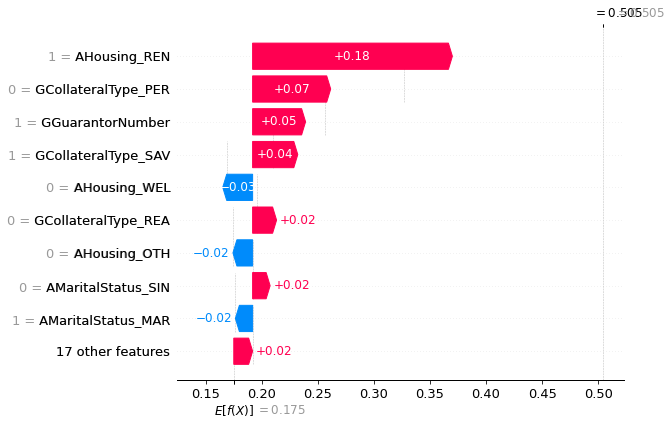

In [ ]:
# https://github.com/slundberg/shap/issues/1420
class ShapInput(object):
    def __init__(self, expectation, shap_values, features, feat_names):
        self.base_values = expectation
        self.values = shap_values
        self.data = features
        self.feature_names = feat_names

i = 0
shap_input = ShapInput(global_avg, shap_values[i], 
                       xmat_test[i, :], feat_names=loandf.columns[1:])

shap.waterfall_plot(shap_input)

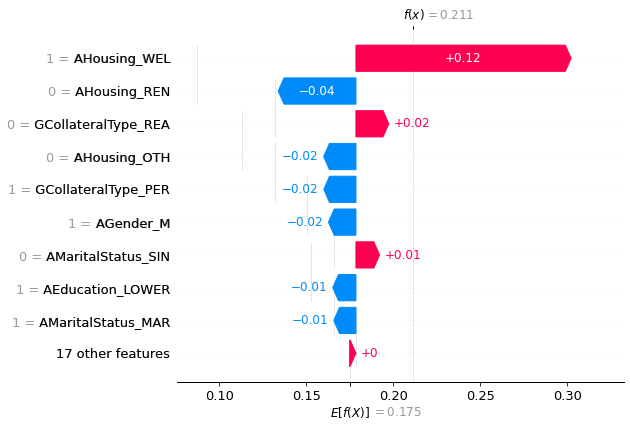

In [ ]:
i = 1
shap_input = ShapInput(global_avg, shap_values[i], 
                       xmat_test[i, :], feat_names=loandf.columns[1:])

shap.waterfall_plot(shap_input)

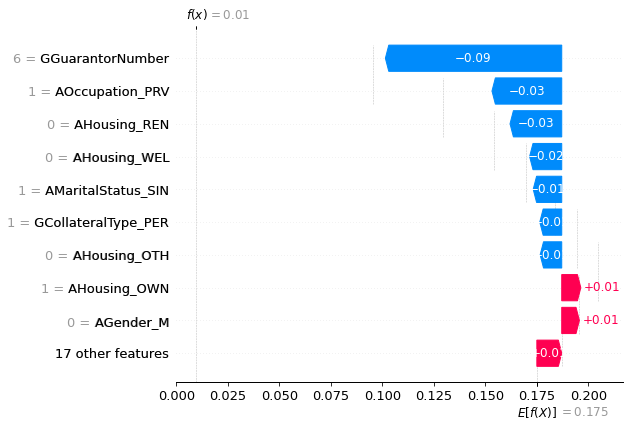

In [ ]:
i = 2
shap_input = ShapInput(global_avg, shap_values[i], 
                       xmat_test[i, :], feat_names=loandf.columns[1:])

shap.waterfall_plot(shap_input)

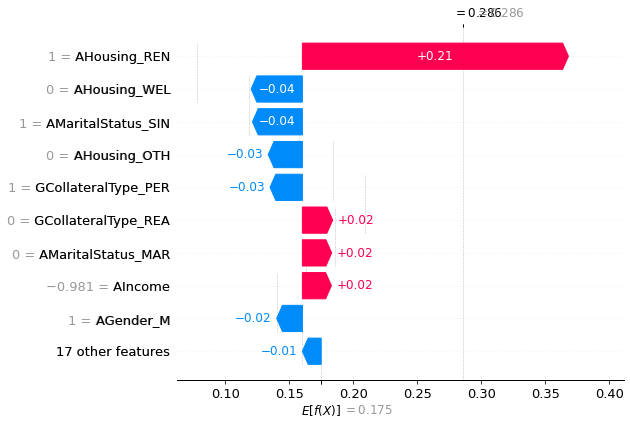

In [ ]:
i = 3
shap_input = ShapInput(global_avg, shap_values[i], 
                       xmat_test[i, :], feat_names=loandf.columns[1:])

shap.waterfall_plot(shap_input)

### 3.2 Scatter and Bar by Feature

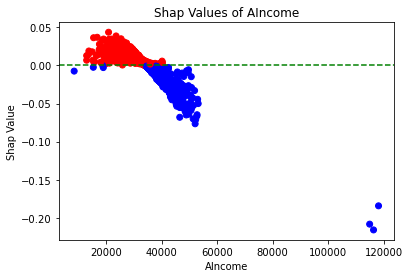

In [ ]:
fig, ax = plt.subplots()
col_idx = 0
color = np.where(shap_values[:,col_idx] > 0, "red", "blue")
ax.scatter(X_test.iloc[:,col_idx],shap_values[:,col_idx], c = color)
x_col_name = X_test.columns[col_idx]
ax.set(xlabel = x_col_name, ylabel = "Shap Value", title = f"Shap Values of {x_col_name}")
ax.axhline(y = 0, color = 'green', linestyle = '--')

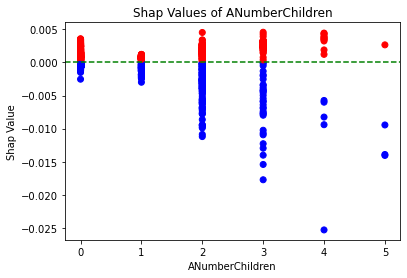

In [ ]:
fig, ax = plt.subplots()
col_idx = 1
color = np.where(shap_values[:,col_idx] > 0, "red", "blue")
ax.scatter(X_test.iloc[:,col_idx],shap_values[:,col_idx], c = color)
x_col_name = X_test.columns[col_idx]
ax.set(xlabel = x_col_name, ylabel = "Shap Value", title = f"Shap Values of {x_col_name}")
ax.axhline(y = 0, color = 'green', linestyle = '--')

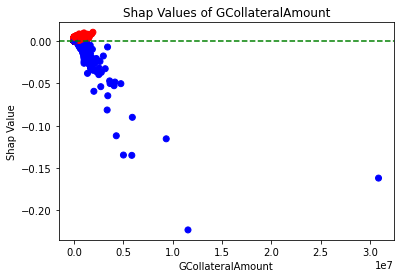

In [ ]:
fig, ax = plt.subplots()
col_idx = 2
color = np.where(shap_values[:,col_idx] > 0, "red", "blue")
ax.scatter(X_test.iloc[:,col_idx],shap_values[:,col_idx], c = color)
x_col_name = X_test.columns[col_idx]
ax.set(xlabel = x_col_name, ylabel = "Shap Value", title = f"Shap Values of {x_col_name}")
ax.axhline(y = 0, color = 'green', linestyle = '--')

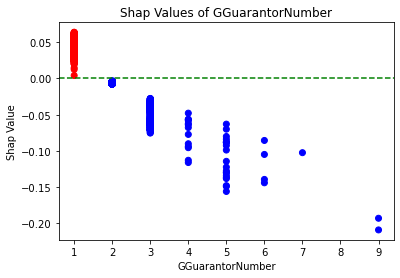

In [ ]:
fig, ax = plt.subplots()
col_idx = 3
color = np.where(shap_values[:,col_idx] > 0, "red", "blue")
ax.scatter(X_test.iloc[:,col_idx],shap_values[:,col_idx], c = color)
x_col_name = X_test.columns[col_idx]
ax.set(xlabel = x_col_name, ylabel = "Shap Value", title = f"Shap Values of {x_col_name}")
ax.axhline(y = 0, color = 'green', linestyle = '--')

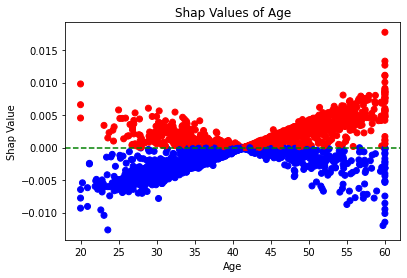

In [ ]:
fig, ax = plt.subplots()
col_idx = 4
color = np.where(shap_values[:,col_idx] > 0, "red", "blue")
ax.scatter(X_test.iloc[:,col_idx],shap_values[:,col_idx], c = color)
x_col_name = X_test.columns[col_idx]
ax.set(xlabel = x_col_name, ylabel = "Shap Value", title = f"Shap Values of {x_col_name}")
ax.axhline(y = 0, color = 'green', linestyle = '--')

In [ ]:
def gen_shap_bar(shap_values, X_test, categorical_columns, display_columns, xlabel, base_label):
    
    average_shap_values = []
    colors = []
    for col in categorical_columns:
        idx_col = list(X_test.columns).index(col)
        idx = X_test[X_test[col] == 1].index
        avg_shap = np.mean(shap_values[idx, idx_col])
        average_shap_values.append(avg_shap)
        if avg_shap > 0:
            colors.append("red")
        else:
            colors.append("blue")
        
    fig, ax = plt.subplots(figsize = (6,4))
    bars = ax.bar(display_columns, average_shap_values)
    for i in range(len(bars)):
        bars[i].set_color(colors[i])
    ax.set(xlabel = xlabel, ylabel = "Average Shap Value", title = f"Shap Values of {xlabel} \n (Base: {base_label})", ylim = [-0.21,0.21])
    ax.tick_params(axis='x', labelrotation=30)
    ax.axhline(y = 0, color = 'green', linestyle = '--')

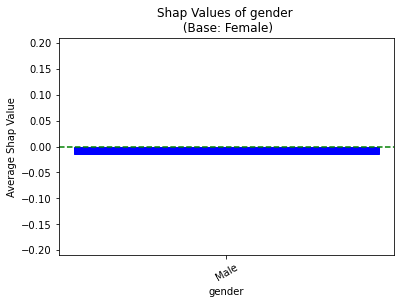

In [ ]:
gen_shap_bar(shap_values, X_test, ["AGender_M"], ["Male"], "gender", "Female")

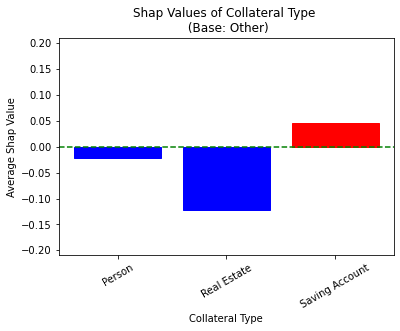

In [ ]:
gen_shap_bar(shap_values, X_test, 
             ["GCollateralType_PER", "GCollateralType_REA", "GCollateralType_SAV"], 
             ["Person", "Real Estate", "Saving Account"], "Collateral Type", "Other")

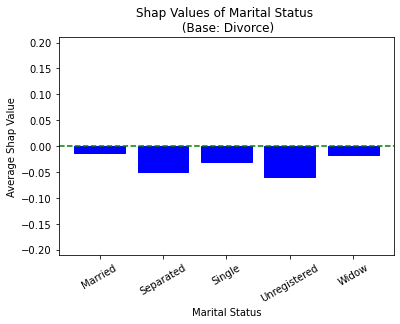

In [ ]:
gen_shap_bar(shap_values, X_test, 
             ["AMaritalStatus_MAR", "AMaritalStatus_SEP", "AMaritalStatus_SIN", "AMaritalStatus_UNR", "AMaritalStatus_WID"], 
             ["Married", "Separated", "Single", "Unregistered", "Widow"], "Marital Status", "Divorce")

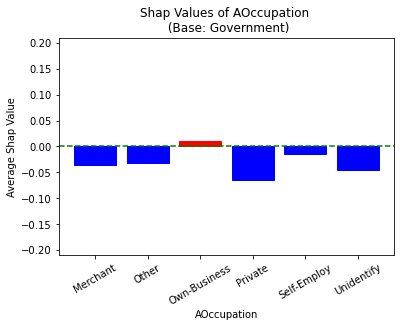

In [ ]:
gen_shap_bar(shap_values, X_test, 
             ["AOccupation_MER", "AOccupation_OTH", "AOccupation_OWN", "AOccupation_PRV", "AOccupation_SLF", "AOccupation_UNI"], 
             ["Merchant", "Other", "Own-Business", "Private", "Self-Employ", "Unidentify"], "AOccupation", "Government")

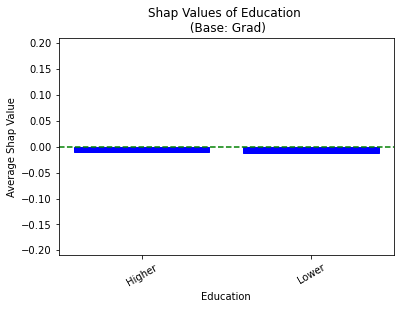

In [ ]:
gen_shap_bar(shap_values, X_test, 
             ["AEducation_HIGHER", "AEducation_LOWER"], 
             ["Higher", "Lower"], "Education", "Grad")

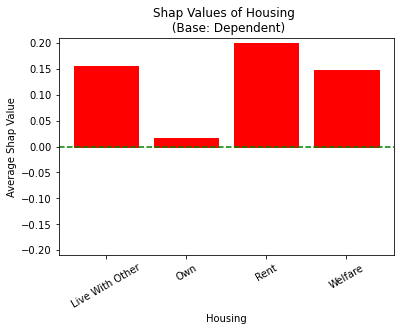

In [ ]:
gen_shap_bar(shap_values, X_test, 
             ["AHousing_OTH", "AHousing_OWN", "AHousing_REN", "AHousing_WEL"], 
             ["Live With Other", "Own", "Rent", "Welfare"], "Housing", "Dependent")

### 3.3 Feature Importances

In [ ]:
avg_shap = np.sum(abs(shap_values), axis = 0)/X_test.shape[0]
feature_importances = []
for i in range(X_test.shape[1]):
    f_importance = avg_shap[i]
    feature_name = X_test.columns[i]
    feature_importances.append((feature_name, f_importance))
    
feature_importances = sorted(feature_importances, key = lambda x: x[1])

In [ ]:
print(len(feature_importances))

26


In [ ]:
top_k = 15
top_features = feature_importances[-top_k:]
other_features = feature_importances[:-top_k]
other_feature_importances = sum([x[1] for x in other_features])
top_features.insert(0, ("Other Features", other_feature_importances))

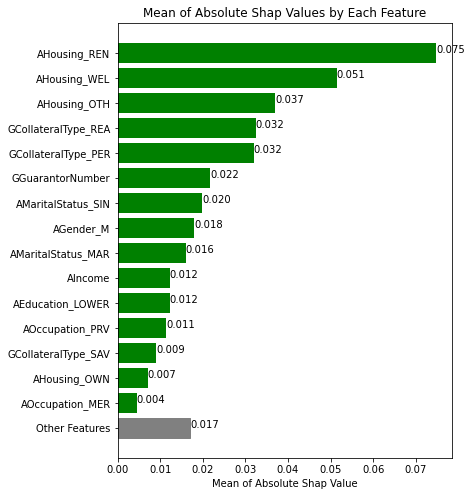

In [ ]:
fig, ax = plt.subplots(figsize = (6,8))

hbars = ax.barh([x[0] for x in top_features], [x[1] for x in top_features], color = "green")
ax.set(xlabel = "Mean of Absolute Shap Value", title = f"Mean of Absolute Shap Values by Each Feature")
                
for bar in hbars:
    width = bar.get_width()
    label_y = bar.get_y() + bar.get_height() / 2
    ax.text(width, label_y, s=f'{width:.3f}')

hbars[0].set_color("grey")